<a href="https://colab.research.google.com/github/eeee-day/hongong_data/blob/main/(code)%20Ch2.1_%ED%8C%8C%EC%9D%B4%EC%8D%AC%EC%97%90%EC%84%9C_XML_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%8B%A4%EB%A3%A8%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> *XML?*

*   eXtensible Markup Language
*   엘리먼트들이 계층 구조를 이루면서 정보를 표현
*   컴퓨터와 사람이 모두 읽고 쓰기 편한 문서
*   XML의 구조
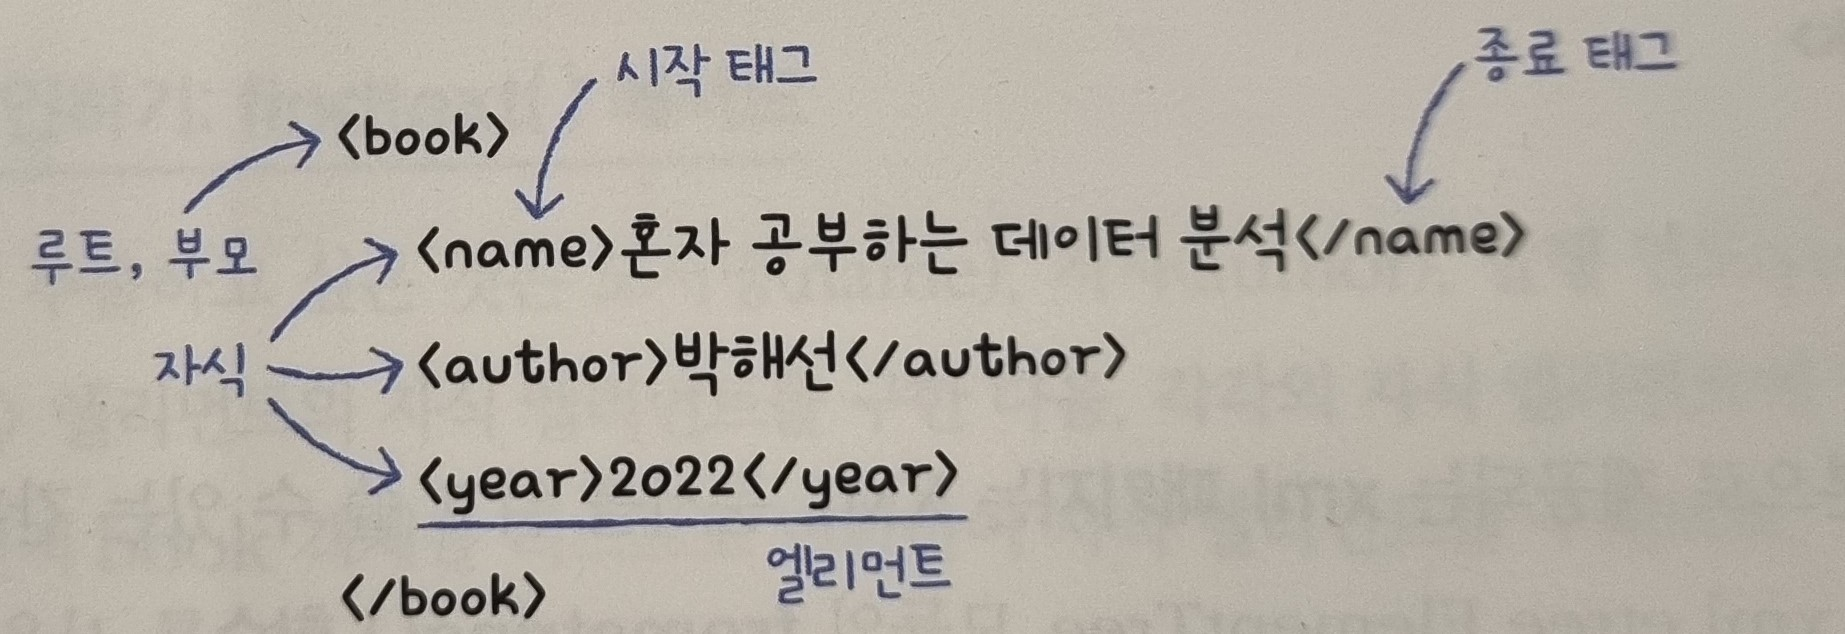

⭐ HTML은 웹 페이지를 표현하는 데는 뛰어나지만, 구조적이지 못하기 때문에 프로그램 간의 약속대로 전송하는 API에서는 적절하지 않다

In [6]:
#파이썬에서 XML데이터 다루기
#XML 문자열을 파이썬 객체로 변환하기 : fromstring() 함수

x_str="""
<book>
  <name>혼자 공부하는 데이터분석</name>
  <author>박해선</author>
  <year>2022</year>
</book>
"""
#태그는 열고 꼭 닫아주어야하며, 특수문자와 공백 문자를 포함할 수 없고, 숫자로 시작할 수 없다

import xml.etree.ElementTree as et
book=et.fromstring(x_str)

print(book.tag) #부모 엘리먼트 확인
#객체의 tag 속성을 출력하면 엘리먼트 이름을 쉽게 확인할 수 있음
print(type(book))

book
<class 'xml.etree.ElementTree.Element'>


In [8]:
#자식 엘리먼트 확인하기 : findtext() 메서드

#step 1. book 객체를 리스트로 변환하여 자식 엘리먼트 확인하기
book_childs=list(book)
print(book_childs)

[<Element 'name' at 0x79be215ca3e0>, <Element 'author' at 0x79be215cab10>, <Element 'year' at 0x79be215cb2e0>]


In [10]:
#step 2. book_childs 리스트 각 항목을 각 변수에 할당하고 text 속성으로 출력하기
name, author, year=book_childs
print(name.text)
print(author.text)
print(year.text)

혼자 공부하는 데이터분석
박해선
2022


In [12]:
#자식 엘리먼트를 탐색하여 자동으로 텍스트 반환하기 : findtext() 메서드

name = book.findtext('name')
author = book.findtext('author')
year = book.findtext('year')

print(name)
print(author)
print(year)
#해당 방법을 사용하면 엘리먼트의 순서에 관계없이 찾을 수 있기 때문에 더욱 안전한 방법임

혼자 공부하는 데이터분석
박해선
2022


In [14]:
#복잡한 XML 문서 만들기

x2_str="""
<books>
  <book>
    <name>혼자 공부하는 데이터분석</name>
    <author>박해선</author>
    <year>2022</year>
  </book>
  <book>
    <name>혼자 공부하는 머신러닝+딥러닝</name>
    <author>박해선</author>
    <year>2020</year>
  </book>
</books>
"""

books=et.fromstring(x2_str)
print(books.tag) #부모 엘리먼트 확인

books


In [16]:
#여러 개의 자식 엘리먼트 확인하기 : findall() 메서드와 for 문

for book in books.findall('book'):
  name = book.findtext('name')
  author = book.findtext('author')
  year = book.findtext('year')
  print(name)
  print(author)
  print(year)
  print()

혼자 공부하는 데이터분석
박해선
2022

혼자 공부하는 머신러닝+딥러닝
박해선
2020



In [18]:
#XML을 바로 판다스로 바꾸기

import pandas as pd
pd.read_xml(x2_str)

,name,author,year
0,혼자 공부하는 데이터분석,박해선,2022
1,혼자 공부하는 머신러닝+딥러닝,박해선,2020
